In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import numpy as np
from imagecorruptions import corrupt
from PIL import Image
import seaborn as sns

In [2]:
def perturb(i, p):
    perturbed = []
    for s in [1,2,3,4,5]:
        perturbed.append(corrupt(i, corruption_name=p, severity=s))
    return perturbed

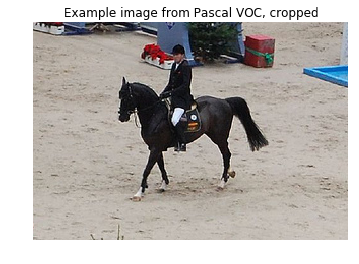

In [7]:
img = mpimg.imread('../raw-data/pascal_voc/Example_Pascal_VOC.jpg')  
img_cropped = img[60:-100, 70:-120]
plt.imshow(np.uint8(img_cropped))
plt.title('Example image from Pascal VOC, cropped')
plt.axis('off')
plt.show()


In [8]:
corruptions = ['gaussian_noise', 'shot_noise', 'impulse_noise', 'defocus_blur',
                'glass_blur', 'motion_blur', 'zoom_blur', 'snow', 'frost', 'fog',
                'brightness', 'contrast', 'elastic_transform', 'pixelate', 'jpeg_compression',
                'speckle_noise', 'gaussian_blur', 'spatter', 'saturate']

corruption_dict = \
    {'brightness': 'Brightness',
     'contrast': 'Contrast' ,
      'defocus_blur': 'Defocus Blur',
      'elastic_transform': 'Elastic Transform',
      'fog': 'Fog',
      'frost': 'Frost',
      'gaussian_noise': 'Gaussian Noise',
      'glass_blur': 'Glass Blur',
      'impulse_noise': 'Impulse Noise',
      'jpeg_compression': 'JPEG Compression',
      'motion_blur': 'Motion Blur',
      'pixelate': 'Pixelate',
      'shot_noise': 'Shot Noise',
      'snow': 'Snow',
      'zoom_blur': 'Zoom Blur',
      'speckle_noise': 'Speckle Noise',
      'gaussian_blur': 'Gaussian Blur',
      'spatter': 'Spatter',
      'saturate': 'Saturate'}

In [9]:
perturbed = [perturb(img, p) for p in corruptions]

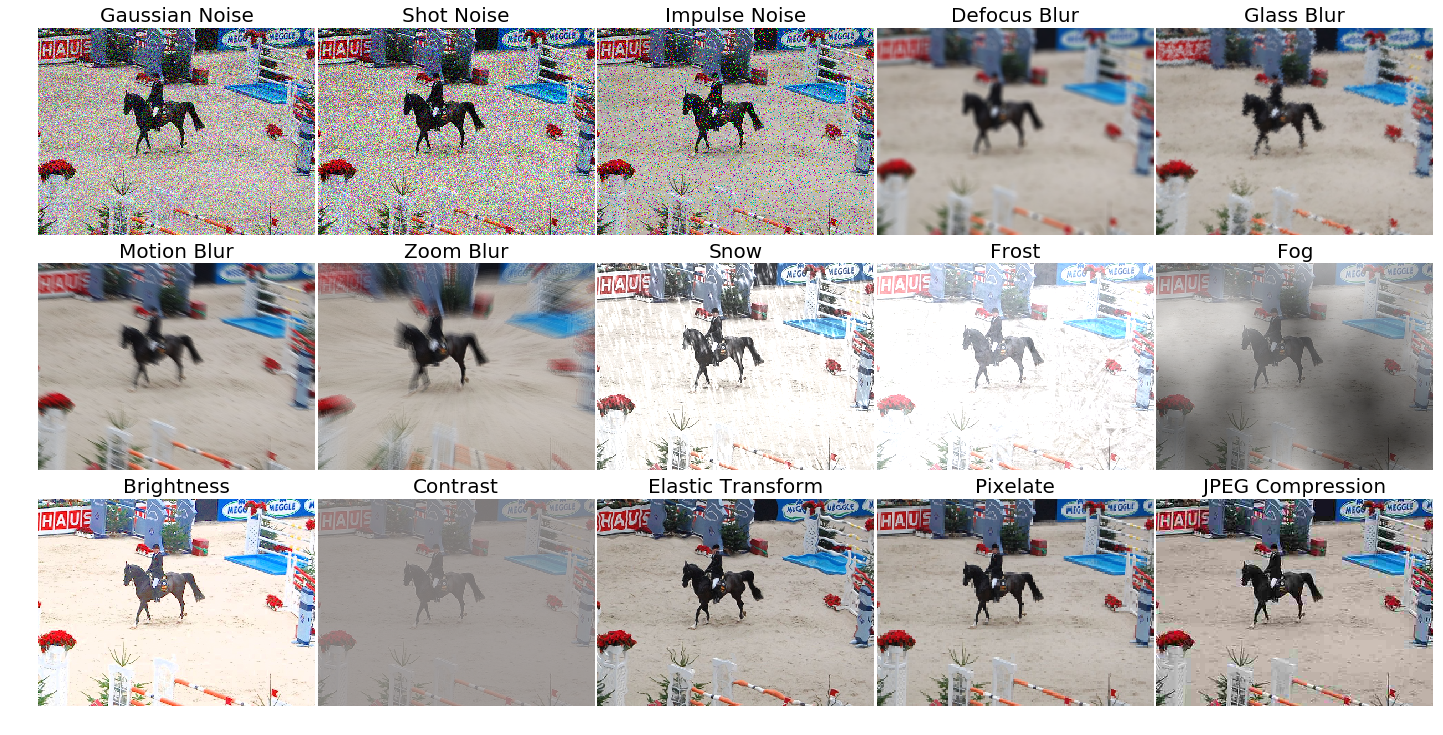

In [11]:
#### Visualize corruptions on Pascal VOC

fig = plt.figure(figsize = (25.0, 13.0))
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

# Display this corruption severity:
severity = 3

for i, p in enumerate(perturbed):
    if i > 14:
        break
    for j, corr_img in enumerate(p):
        if j == severity-1:
            plt.subplot(3,5,i+1)
            plt.imshow(corr_img)      

            plt.title(corruption_dict[corruptions[i]], fontsize=20)
            plt.axis('off')

sns.despine(trim=True, offset=5)
plt.subplots_adjust(wspace=0.01, hspace=0.0001)
plt.show()

fig_title = '../figures/methods/visualize_corruptions_' + str(severity) + '_cropped.png'
fig.savefig(fig_title, bbox_inches='tight')

fig_title = '../figures/methods/visualize_corruptions_' + str(severity) + '_cropped.pdf'
fig.savefig(fig_title, bbox_inches='tight')